<h2>Dataset Link</h2>

https://www.kaggle.com/datasets/orvile/health-and-sleep-relation-2024

<h2>Data Preprocessing</h2>

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
from keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [6]:
df = df.drop('Person ID', axis=1)

In [7]:
df.duplicated().sum()

242

In [8]:
df[['SBP', 'DBP']] = df['Blood Pressure'].str.split('/', expand=True)

df['SBP'] = pd.to_numeric(df['SBP'])
df['DBP'] = pd.to_numeric(df['DBP'])

In [9]:
def categorize_bp(sbp, dbp):
    if sbp >= 130 or dbp >= 80:
        return 'Hypertension'
    elif sbp < 90 or dbp < 60:
        return 'Hypotension'
    else:
        return 'Normal'

df['Blood Pressure'] = df.apply(lambda row: categorize_bp(row['SBP'], row['DBP']), axis=1)

In [10]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,SBP,DBP
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,Hypertension,77,4200,None,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,Hypertension,75,10000,None,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,Hypertension,75,10000,None,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,Hypertension,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,Hypertension,85,3000,Sleep Apnea,140,90


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           374 non-null    object 
 12  SBP                      374 non-null    int64  
 13  DBP                      374 non-null    int64  
dtypes: float64(1), int64(8), o

In [12]:
df.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,SBP,DBP
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920,128.553476,84.649733
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679,7.748118,6.161611
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000,115.000000,75.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000,125.000000,80.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000,130.000000,85.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000,135.000000,90.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000,142.000000,95.000000


In [13]:
df.nunique()

Gender                      2
Age                        31
Occupation                 11
Sleep Duration             27
Quality of Sleep            6
Physical Activity Level    16
Stress Level                6
BMI Category                4
Blood Pressure              2
Heart Rate                 19
Daily Steps                20
Sleep Disorder              3
SBP                        18
DBP                        17
dtype: int64

In [14]:
df['Occupation'].unique()

array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Salesperson', 'Manager'], dtype=object)

In [15]:
df['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [16]:
df['Sleep Disorder'].unique()

array(['None', 'Sleep Apnea', 'Insomnia'], dtype=object)

<h2>EDA</h2>

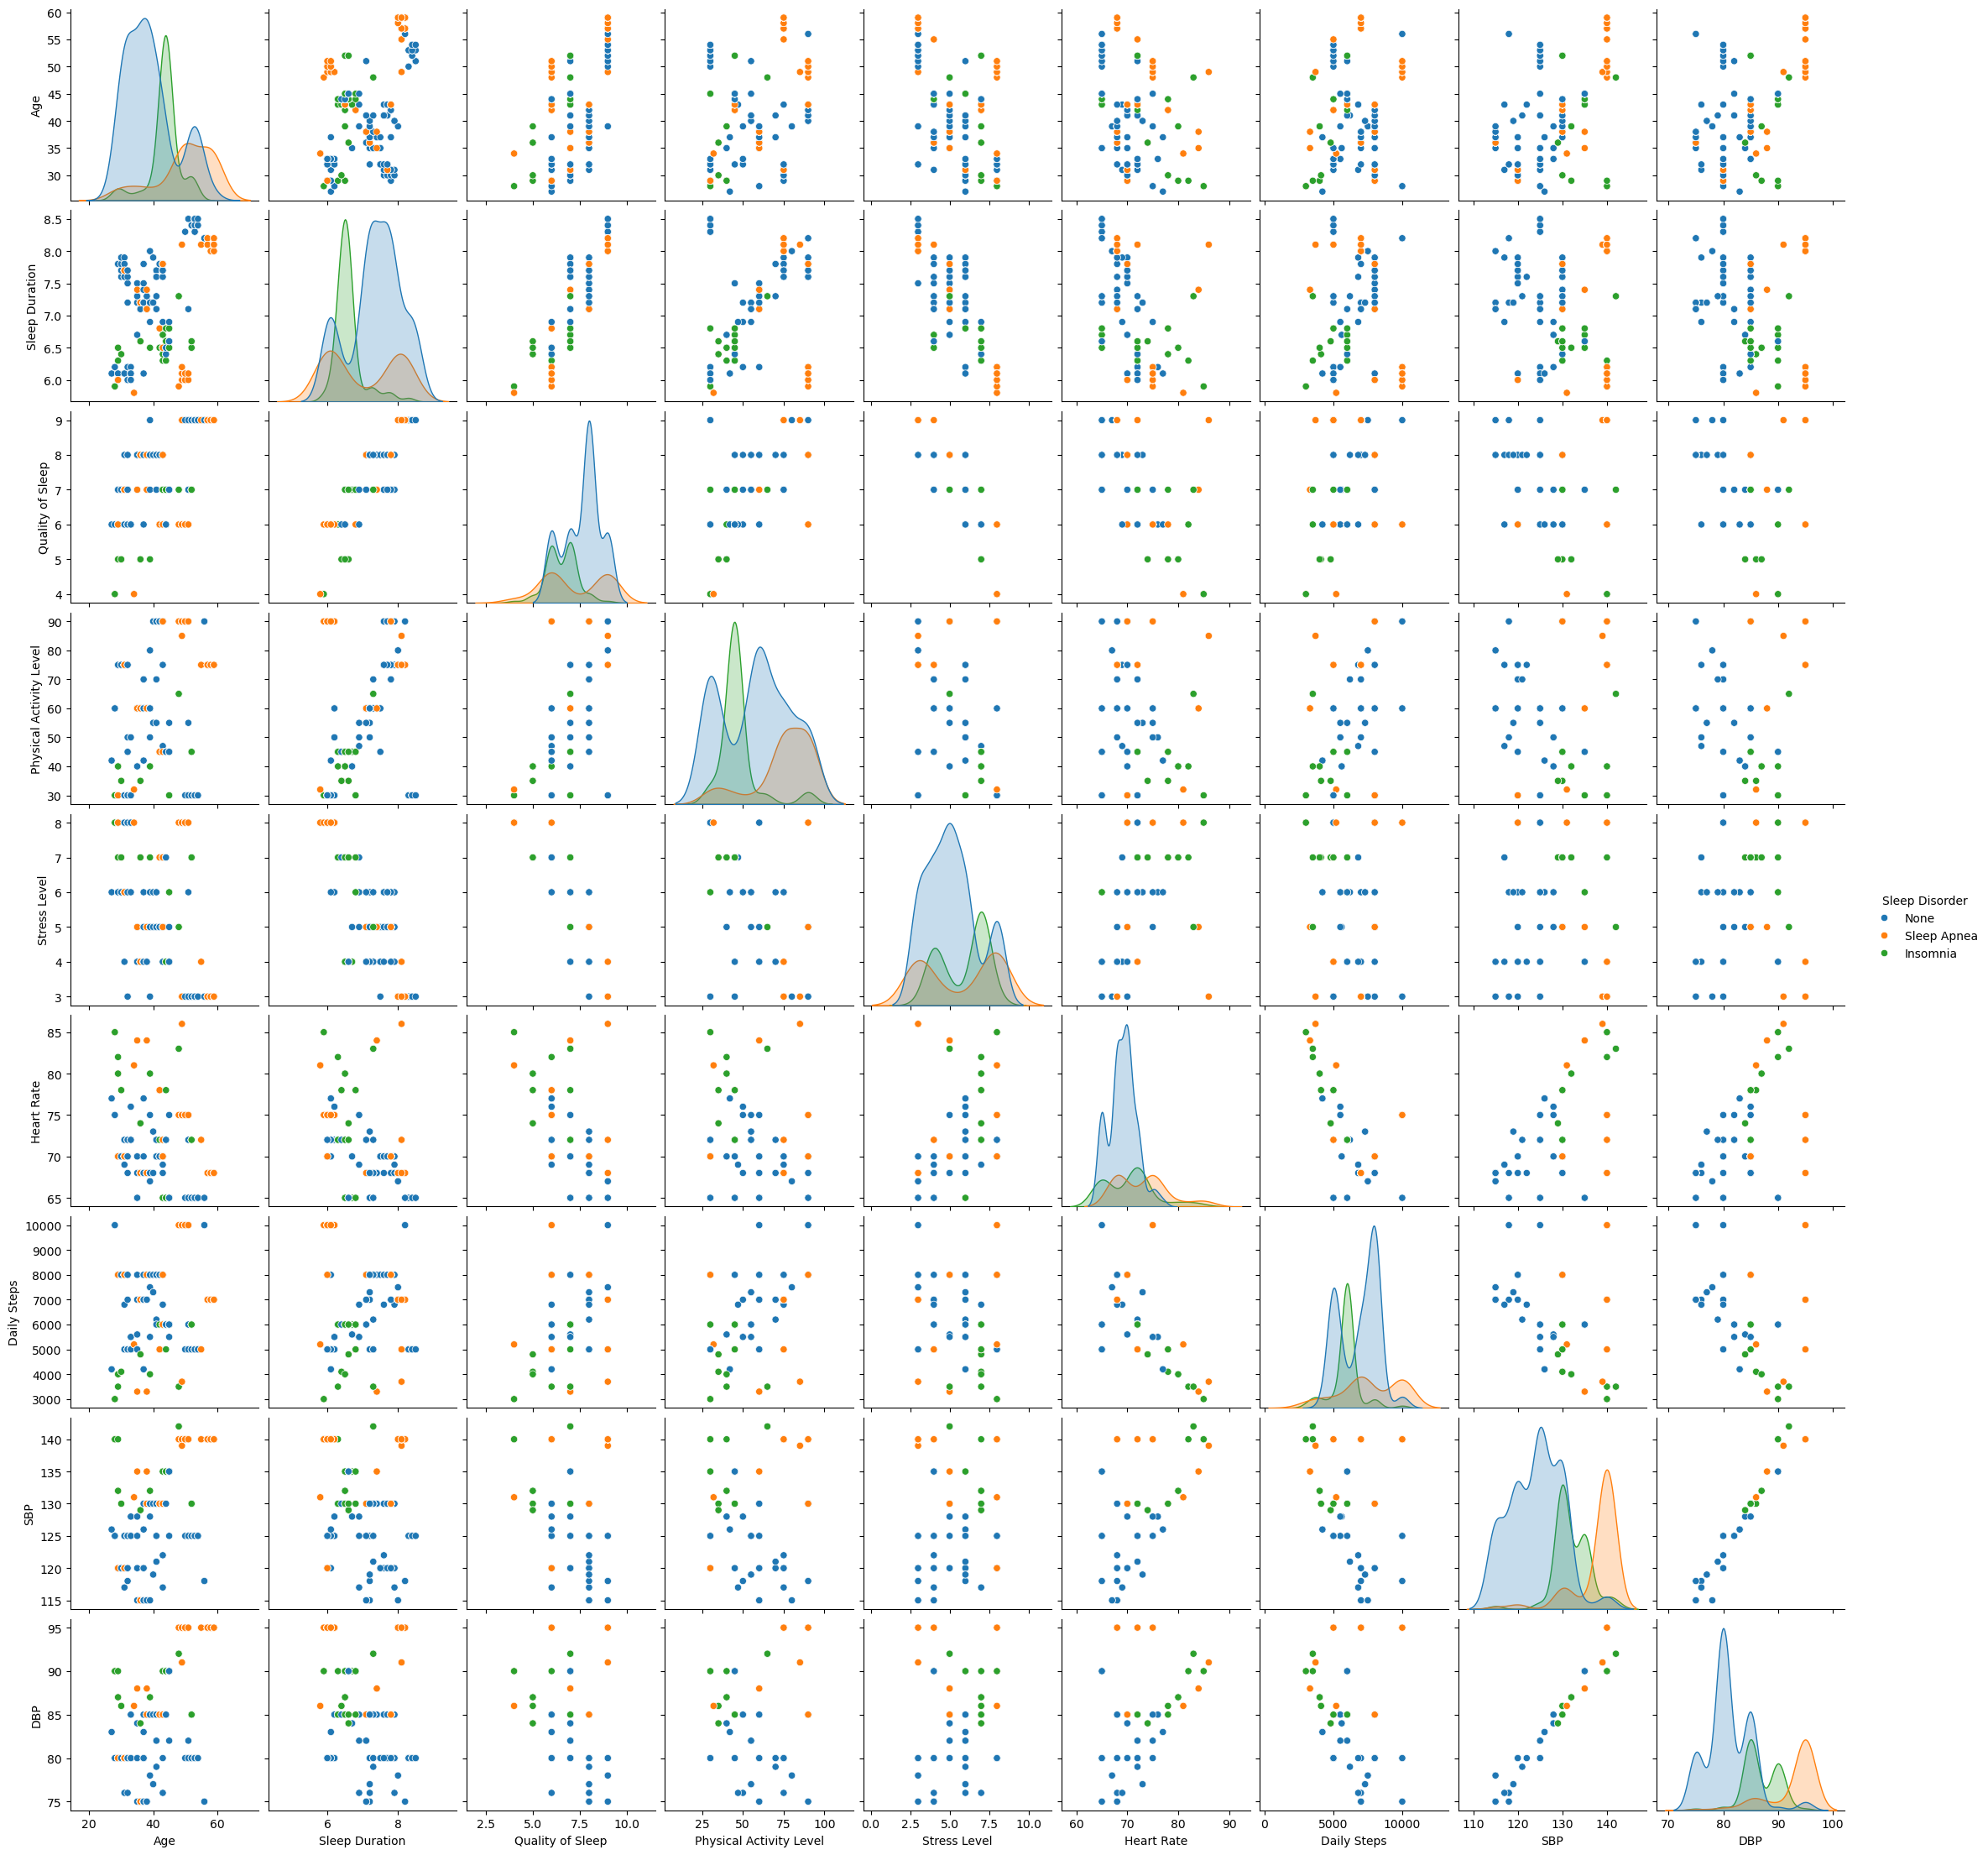

In [18]:
sns.pairplot(df, hue='Sleep Disorder')

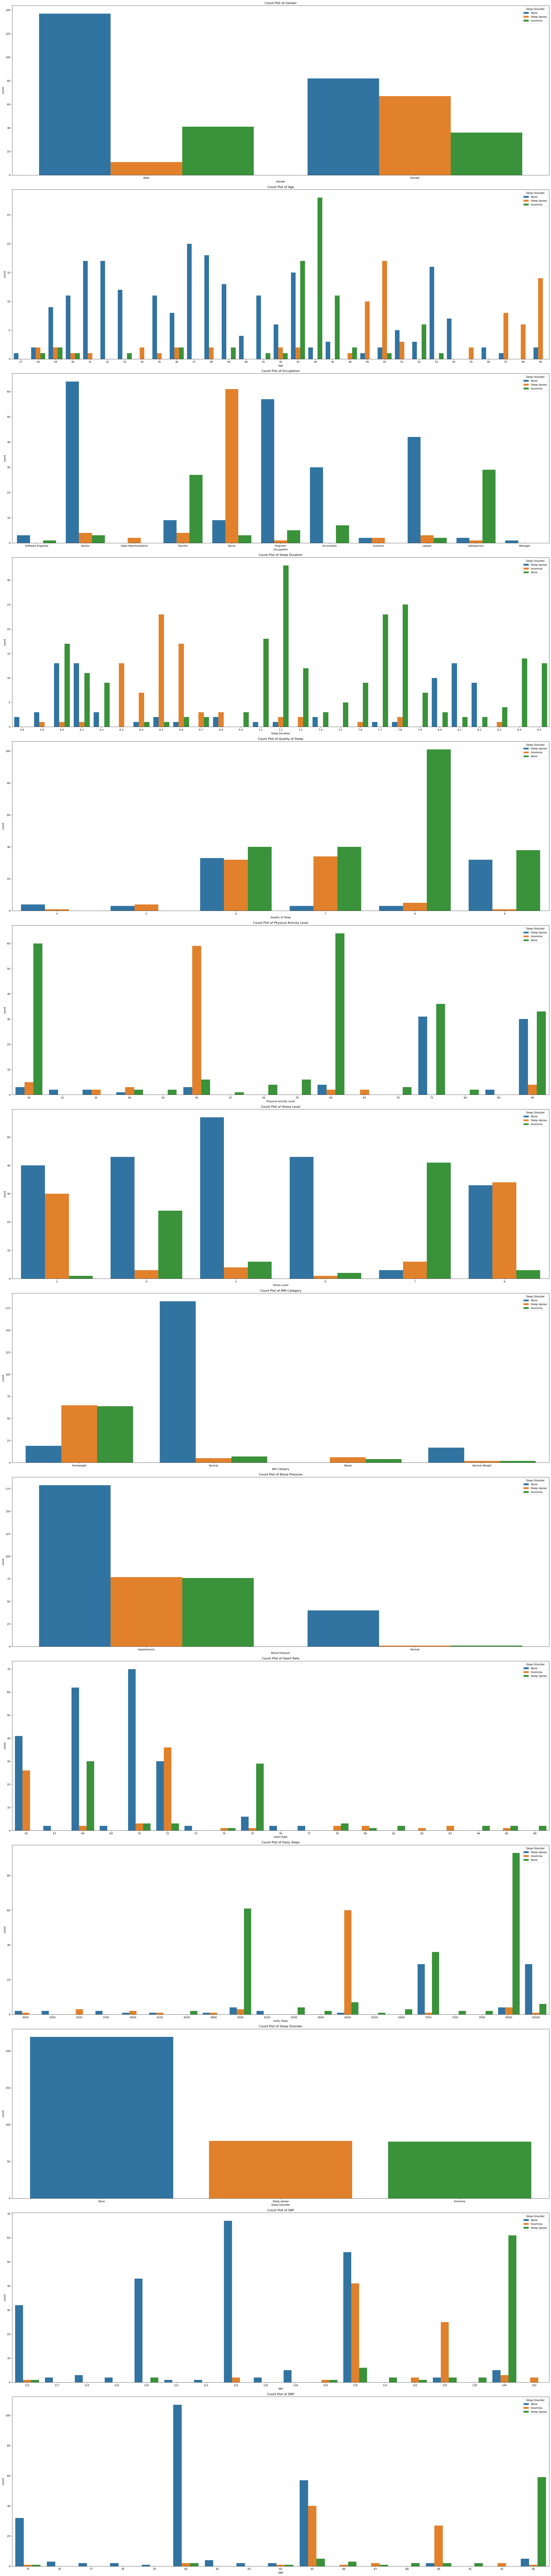

In [19]:
fig, axes = plt.subplots(nrows=len(df.columns), figsize=(30,10 * len(df.columns)))

for i , col in enumerate(df.columns):
    sns.countplot(x=df[col], hue=df['Sleep Disorder'], ax=axes[i])
    axes[i].set_title(f'Count Plot of {col}')
plt.tight_layout()
plt.show();

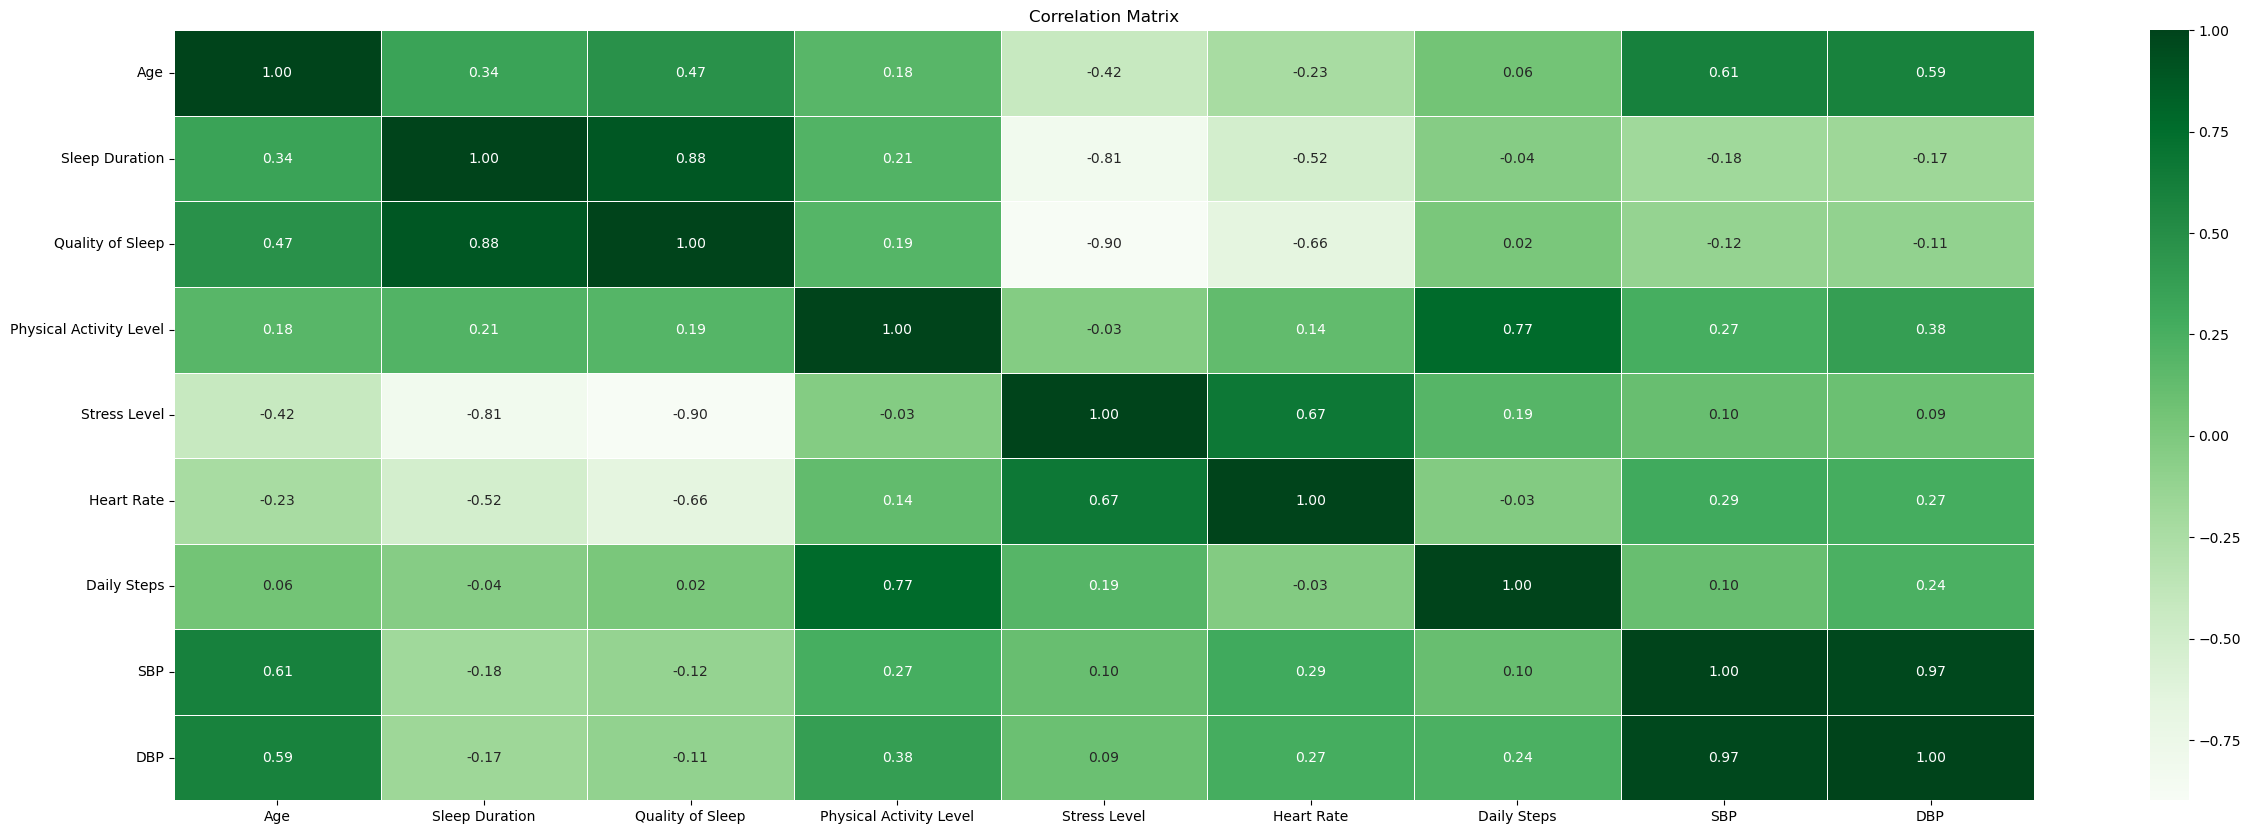

In [20]:
plt.figure(figsize=(30,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="Greens", fmt='.2f', linewidth=0.5)
plt.title('Correlation Matrix')
plt.show();

<h2>Data Splitting</h2>

In [22]:
x = df.drop('Sleep Disorder', axis=1)
y = df['Sleep Disorder']

In [23]:
x_cat = x.select_dtypes(include='object')
x_num = x.select_dtypes(exclude='object')

encoders = {}
label_mappings = {}

for col in x_cat.columns:
    le = LabelEncoder()
    x_cat[col] = le.fit_transform(x_cat[col])
    encoders[col] = le
    label_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))

x = pd.concat([x_num, x_cat], axis=1)

for col, mapping in label_mappings.items():
    print(f"{col}")
    print(mapping)
    print(" ")

Gender
{'Female': 0, 'Male': 1}
 
Occupation
{'Accountant': 0, 'Doctor': 1, 'Engineer': 2, 'Lawyer': 3, 'Manager': 4, 'Nurse': 5, 'Sales Representative': 6, 'Salesperson': 7, 'Scientist': 8, 'Software Engineer': 9, 'Teacher': 10}
 
BMI Category
{'Normal': 0, 'Normal Weight': 1, 'Obese': 2, 'Overweight': 3}
 
Blood Pressure
{'Hypertension': 0, 'Normal': 1}
 


In [24]:
le_y = LabelEncoder()
y = le_y.fit_transform(y)
label_mapping = dict(zip(le_y.classes_, le_y.transform(le_y.classes_)))
print(label_mapping)

{'Insomnia': 0, 'None': 1, 'Sleep Apnea': 2}


In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [26]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

<h2>Machine Learning</h2>

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)
gb.fit(x_train, y_train)
gb.score(x_train, y_train)

0.9331103678929766

In [29]:
y_pred = gb.predict(x_test)
print('Accruacy test:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le_y.classes_))
print(confusion_matrix(y_test, y_pred))

Accruacy test: 0.9066666666666666
              precision    recall  f1-score   support

    Insomnia       0.81      0.81      0.81        16
        None       0.95      0.98      0.97        43
 Sleep Apnea       0.87      0.81      0.84        16

    accuracy                           0.91        75
   macro avg       0.88      0.87      0.87        75
weighted avg       0.91      0.91      0.91        75

[[13  1  2]
 [ 1 42  0]
 [ 2  1 13]]


<h2>Deep Learning</h2>

In [31]:
nn = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(3, activation='softmax')
])

nn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = nn.fit(x_train, y_train, epochs=50, batch_size=10, validation_data = (x_test, y_test), callbacks=[EarlyStopping(patience=5)])

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.6718 - loss: 0.8774 - val_accuracy: 0.8933 - val_loss: 0.4568
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8971 - loss: 0.4464 - val_accuracy: 0.8800 - val_loss: 0.4108
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8771 - loss: 0.4156 - val_accuracy: 0.8800 - val_loss: 0.3930
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9159 - loss: 0.3450 - val_accuracy: 0.8933 - val_loss: 0.4052
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9287 - loss: 0.2959 - val_accuracy: 0.9067 - val_loss: 0.4009
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9066 - loss: 0.3611 - val_accuracy: 0.8933 - val_loss: 0.4141
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9323 - loss: 0.2496 - val_accuracy: 0.9067 - val_loss: 0.4049
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9238 - loss: 0.3161 - val_accuracy: 0.8933 - val_loss

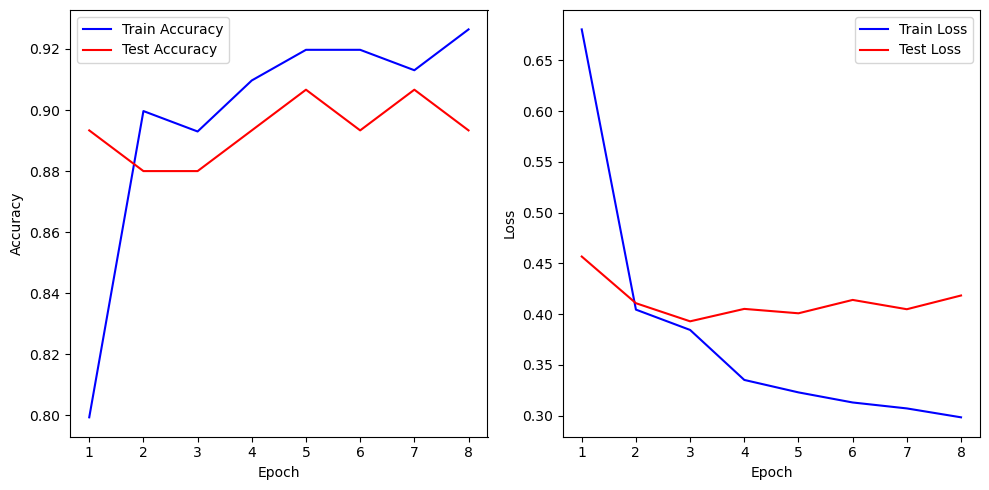

In [32]:
# learning curve
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
# creating subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].plot(epochs, acc, 'b', label='Train Accuracy')
axes[0].plot(epochs, val_acc, 'r', label='Test Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

axes[1].plot(epochs, loss, 'b', label='Train Loss')
axes[1].plot(epochs, val_loss, 'r', label='Test Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
# adusting layout for better spacing
plt.tight_layout()
# display the figure
plt.show();

In [33]:
pred = nn.predict(x_test)
y_pred = np.argmax(pred, axis=1)

print("Test Accuracy:", accuracy_score(y_test, y_pred))    
print(classification_report(y_test, y_pred, target_names=le_y.classes_))
print(confusion_matrix(y_test, y_pred))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Test Accuracy: 0.8933333333333333
              precision    recall  f1-score   support

    Insomnia       0.74      0.88      0.80        16
        None       0.95      0.95      0.95        43
 Sleep Apnea       0.92      0.75      0.83        16

    accuracy                           0.89        75
   macro avg       0.87      0.86      0.86        75
weighted avg       0.90      0.89      0.89        75

[[14  1  1]
 [ 2 41  0]
 [ 3  1 12]]


<h2>Machine Learning vs Deep Learning</h2>

In [42]:
new_df = [[1, 35, 6, 7.1, 6, 45, 4, 0, 0, 78, 3001, 121, 79]]
scaled_df = sc.transform(new_df)

ML_pred = gb.predict(scaled_df)
ori_class = le_y.inverse_transform(ML_pred)

y_pred = nn.predict(scaled_df)
NN_pred = np.argmax(y_pred, axis=1)

print("ML Prediction: ", ori_class[0])
print("DL Prediction:", le_y.inverse_transform(NN_pred)[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
ML Prediction:  None
DL Prediction: None
